# Flare 2021/05/26


Event#	EName	Start	Stop	Peak	GOES Class	Derived Position
1	gev_20210526_0946	2021/05/26 09:46:00	10:00:00	09:55:00	C1.2	N23W53 ( 2826 )
Flare Locator Image


12826	N24W58
(734",396")	β/-	Cri/---	0020/----	08/--	C1.2(17:03)
C1.0(14:20)
C1.2(09:46)
C1.1(07:51) / -

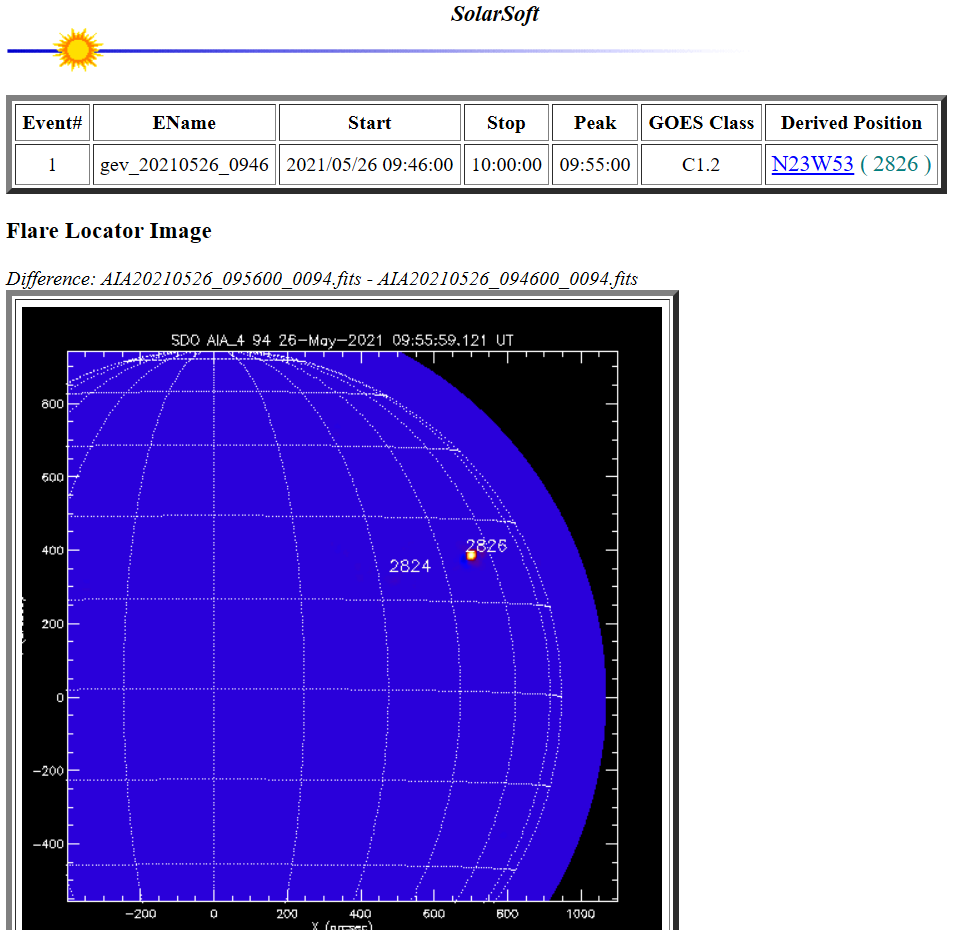

In [1]:

import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:\solar flares\data\\2021-05-26\\fits\\nb_6173_2021-05-26T09_48_51_09_48_51=0-82_stokes_corrected_nup_export2022-07-08T17_26_30_im.fits"

maximum = 1000 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return folder_path
ttff = timeframe_to_filename_fits



<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_21636\458073183.py:4: SyntaxWarning: invalid escape sequence '\s'
  folder_path = "E:\solar flares\data\\2021-05-26\\fits\\nb_6173_2021-05-26T09_48_51_09_48_51=0-82_stokes_corrected_nup_export2022-07-08T17_26_30_im.fits"


In [3]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
head0

 [astropy.io.fits.verify]


SIMPLE  =                    T / Written by IDL:  Wed Jun  9 10:32:38 2021      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 1386 / Number of positions along axis 1               
NAXIS2  =                 1386 / Number of positions along axis 2               
NAXIS3  =                    9 / Number of positions along axis 3               
NAXIS4  =                    4 / Number of positions along axis 4               
NAXIS5  =                   83 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
OBS_HDU =                    1 /                                                
BUNIT   = 'W m^-2 Hz^-1 sr^-1' / Units in array                                 
BTYPE   = 'Intensity'          / Type of data in array                          
FILTER1 = '6173    '        

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io[:10]):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[4].data
    pos = io[1].data


wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstFe.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002849DCFF920>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DCFE4E0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000002849DCFEFF0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD54C20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD55370>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD55AC0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD56210>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD56960>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD574D0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD57E00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD5C770>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD5CEC0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD5D610>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002849DD5DD60>, <astropy.io.fits.hdu.ta

In [5]:
pos[0][0][:,:,0,0,2][0]

array([617.2825, 617.2895, 617.293 , 617.2965, 617.3   , 617.3035,
       617.307 , 617.3105, 617.3175], dtype='>f8')

In [6]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3

array(['2021-05-26T09:48:53.25791', '2021-05-26T09:49:12.43891',
       '2021-05-26T09:49:31.61978', '2021-05-26T09:49:50.80069',
       '2021-05-26T09:50:09.98164', '2021-05-26T09:50:29.16246',
       '2021-05-26T09:50:48.34340', '2021-05-26T09:51:07.52445',
       '2021-05-26T09:51:26.70551', '2021-05-26T09:51:45.88657',
       '2021-05-26T09:52:05.06760', '2021-05-26T09:52:24.24866',
       '2021-05-26T09:52:43.42971', '2021-05-26T09:53:02.61071',
       '2021-05-26T09:53:21.79166', '2021-05-26T09:53:40.97277',
       '2021-05-26T09:54:00.15380', '2021-05-26T09:54:19.33478',
       '2021-05-26T09:54:38.51584', '2021-05-26T09:54:57.69684',
       '2021-05-26T09:55:16.87782', '2021-05-26T09:55:36.05886',
       '2021-05-26T09:55:55.23989', '2021-05-26T09:56:14.42084',
       '2021-05-26T09:56:33.60172', '2021-05-26T09:56:52.78276',
       '2021-05-26T09:57:11.96378', '2021-05-26T09:57:31.14480',
       '2021-05-26T09:57:50.32573', '2021-05-26T09:58:09.50676',
       '2021-05-26T09:58:

In [7]:
time_list = [t[11:] for t in tlist3]
time_list

['09:48:53.25791',
 '09:49:12.43891',
 '09:49:31.61978',
 '09:49:50.80069',
 '09:50:09.98164',
 '09:50:29.16246',
 '09:50:48.34340',
 '09:51:07.52445',
 '09:51:26.70551',
 '09:51:45.88657',
 '09:52:05.06760',
 '09:52:24.24866',
 '09:52:43.42971',
 '09:53:02.61071',
 '09:53:21.79166',
 '09:53:40.97277',
 '09:54:00.15380',
 '09:54:19.33478',
 '09:54:38.51584',
 '09:54:57.69684',
 '09:55:16.87782',
 '09:55:36.05886',
 '09:55:55.23989',
 '09:56:14.42084',
 '09:56:33.60172',
 '09:56:52.78276',
 '09:57:11.96378',
 '09:57:31.14480',
 '09:57:50.32573',
 '09:58:09.50676',
 '09:58:28.68772',
 '09:58:47.86865',
 '09:59:07.04973',
 '09:59:26.23065',
 '09:59:45.41179',
 '10:00:04.59280',
 '10:00:23.77384',
 '10:00:42.95479',
 '10:01:02.13575',
 '10:01:21.31680',
 '10:01:40.49780',
 '10:01:59.67891',
 '10:02:18.85987',
 '10:02:38.04091',
 '10:02:57.22194',
 '10:03:16.40302',
 '10:03:35.58407',
 '10:03:54.76508',
 '10:04:13.94598',
 '10:04:33.12706',
 '10:04:52.30808',
 '10:05:11.48903',
 '10:05:30.6

In [8]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [9]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (9, 1386, 1386)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[           nan,            nan,            nan,            nan,
                    nan,            nan,            nan,            nan,
                    nan,            nan,            nan,            nan,
                    nan,            nan],
        [           nan,            nan,            nan,            nan,
                    nan,            nan,            nan, 2.92032318e-08,
                    nan,            nan,            nan,            nan,
                    nan,            nan],
        [           nan,            nan,            nan,            nan,
                    nan,            nan, 1.66047567e-08, 3.14837756e-08,
         1.33407934e-08,            nan,            nan,            nan,
                    nan,            nan],
        [           nan,            nan,            nan,            nan,
                    nan, 3.76860108e-08, 3.25630509e-08, 2.19828706e-08,
         2.78058998e-08, 1.88286524e-08,            nan,            nan

E:\solar flares\data\2021-05-26\fits\nb_6173_2021-05-26T09_48_51_09_48_51=0-82_stokes_corrected_nup_export2022-07-08T17_26_30_im.fits
s=(9, 1386, 1386)
the shape of the data is (83, '??', 9, 1386, 1386)
the wavelengths are self._wavel = array([6172.825, 6172.895, 6172.93 , 6172.965, 6173.   , 6173.035,
       6173.07 , 6173.105, 6173.175])
Use arguments as dictionary with 'frames_of_overlap' to define a list of considerd frames to calculate overlap
calculated boundary at frame 0


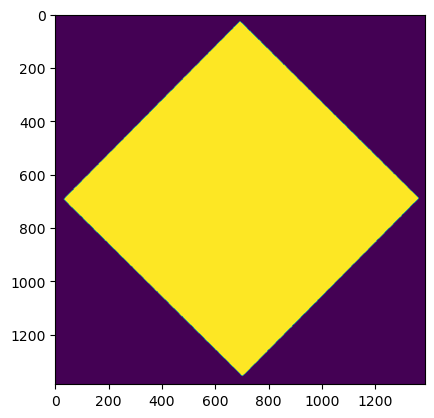

calculated boundary at frame 10


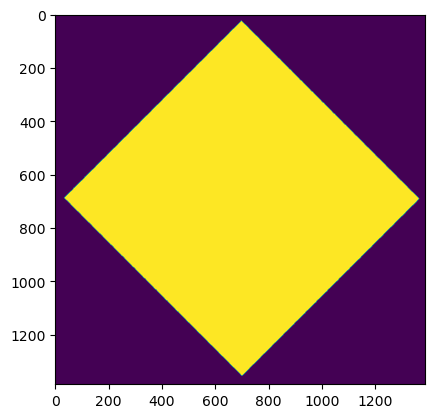

calculated boundary at frame 20


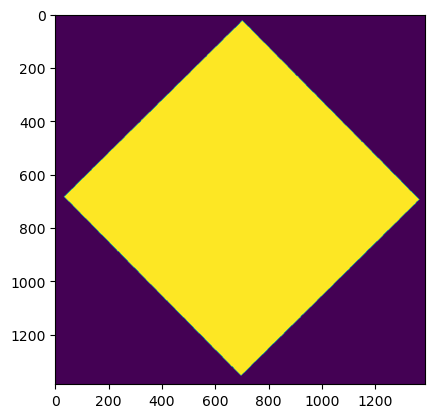

calculated boundary at frame 30


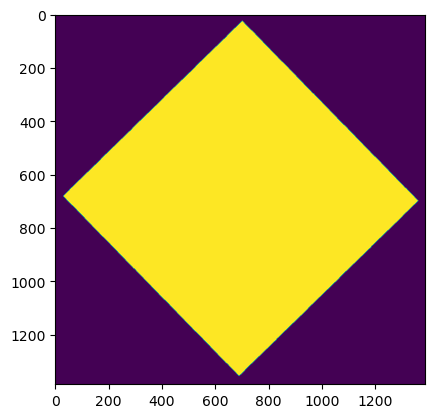

calculated boundary at frame 40


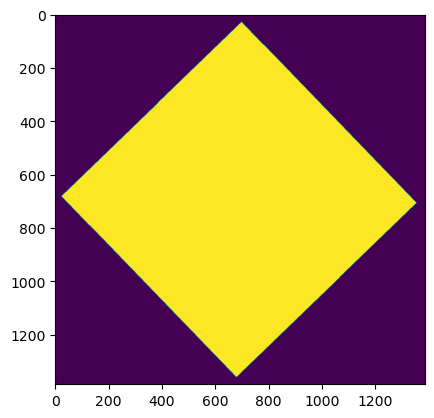

calculated boundary at frame 50


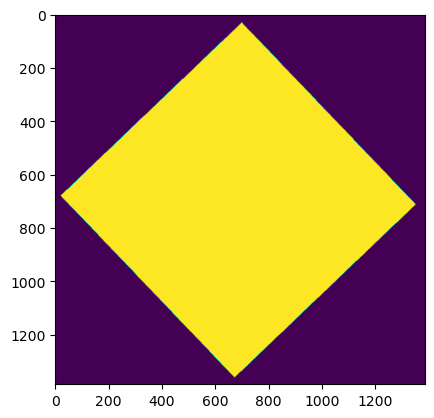

calculated boundary at frame 60


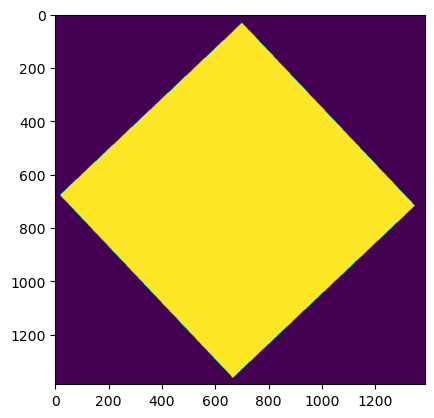

calculated boundary at frame 70


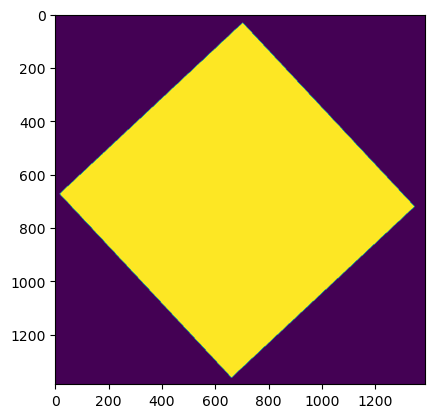

calculated boundary at frame 80


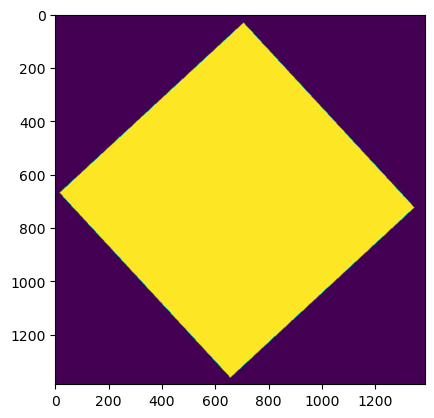

calculated boundary over folowing frames range(0, 83, 10)
Boundary
Blue=Outside, yellow=Inside


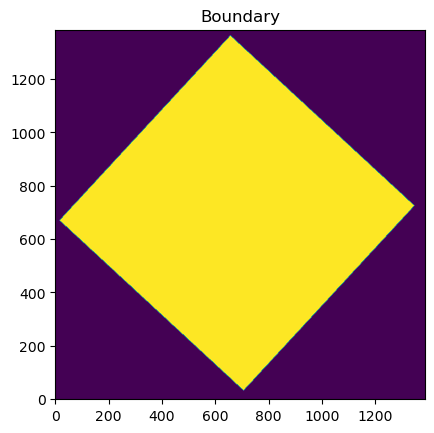

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
reload(un)

Fe = un.SST_data_from_multiple_fits_files(
    timeframe_to_filename_fits,
    spectfilename='line_data/wav_sstFe.npy', 
    number_of_frames=maximum,
    time=time_list, 
    name_of_line='Fe21', 
    thresh=[0, np.percentile(datacube(0), 99.5)],  
    boundary_methode='search_overlap', 
    boundary_arguments = {"error":0.01}, 
    with_stokes=True, 
    with_time=True, 
    alternative_datacube=datacube)

# Fe.datacube
# np.shape(Fe.datacube), Fe.datacube(0)[0:30:5,10:20:5, 100:200:30], 
Fe.boundary


In [11]:
# Fe.calculate__FOV_spect_over_time()

In [12]:
secs = un.get_TIME(Fe)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Fe.shape=}')

the mean cadence is 19.182926829268315 seconds for this line!
Fe.shape=(83, '??', 9, 1386, 1386)


[[1.0, 1.125], [4.0, 1.125], [7.0, 1.125]]
The guessed filters are [[1.0, 1.125], [4.0, 1.125], [7.0, 1.125]]


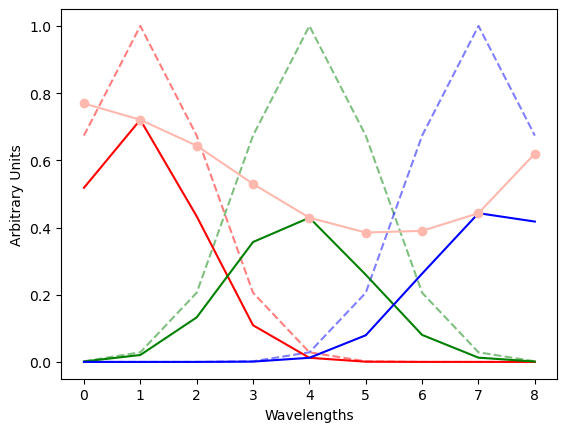

In [13]:
# %matplotlib inline
gf = un.guess_filters(9)
print(gf)
Fe.update_filters(None)# [[3,2], [7,2], [11,2]]
Fe.plot_filt(880,900)
plt.show()

## Calculating the $\mu$ !!!!! 


In [14]:
Fe.shape

(83, '??', 9, 1386, 1386)

In [15]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Fe.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass

x= -598.761391414
y = -353.460135090 
pix_x=  1392.00 
pix_y = 1387.00 

SIMPLE  =                    T / Written by IDL:  Wed Jun  9 10:32:38 2021     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1386 / Number of positions along axis 1              
 NAXIS2  =                 1386 / Number of positions along axis 2              
 NAXIS3  =                    9 / Number of positions along axis 3              
 NAXIS4  =                    4 / Number of positions along axis 4              
 NAXIS5  =                   83 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 OBS_HDU =                    1 /                                               
 BUNIT   = 'W m^-2 Hz^-1 sr^-1' / Units in array                                
 BTYPE   = 'Intensity'          / Type of data in array                         
 FILTER1 = '6173    '        

In [16]:
# WCSNAMEA= 'AVERAGED APPROXIMATE HPLN-TAN/HPLT-TAN CENTER POINT' /               
# CRPIX1A =              1392.00 / Center pixel of image array                    
# CRPIX2A =              1387.00 / Center pixel of image array                    
# CRVAL1A =       -598.761391414 / [arcsec] Coordinates of center of image array  
# CRVAL2A =       -353.460135090 / [arcsec] Coordinates of center of image array  
# CDELT1A =              0.00000 / Zero FOV extent                                
# CDELT2A =              0.00000 / Zero FOV extent                                
# SPECSYS = 'TOPOCENT'           / Coordinate reference frame = observer          

In [17]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
np.shape(xy), xy[maximum//2,0], fxp, fyp

((83, 9, 2, 2, 2),
 array([[[657.93213791, 330.06414694],
         [739.92413791, 330.06414694]],
 
        [[657.93213791, 412.05614694],
         [739.92413791, 412.05614694]]], dtype='>f8'),
 array([657.93213791, 739.92413791, 330.06414694, 412.05614694]),
 array([330.06414694, 412.05614694], dtype='>f8'))

does MU contain nan's? False


AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.5654003696676916 for timeframe 10
Coundourplot succesfully saved.


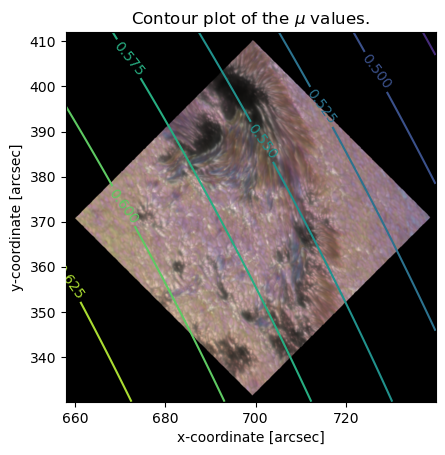

In [43]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu


x = np.linspace(fxp[0], fxp[1], Fe.shape[4])
y = np.linspace(fyp[0], fyp[1], Fe.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))

sst_data.fov = [xx, yy]

reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.ccp_frame(timeFrame, False)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=Fe, save=True, save_name=Fe.name_of_line, timeFrame=10)
sst_data = Fe
set_mu(Fe, mu)
# theor_line.sst_mu[theor_Fe.index_mu], theor_line.sst_clv[theor_Fe.index_mu][0], clv_fit(mu, theor_line)




## Finding a suitable quiet sun patch

<>:40: SyntaxWarning: invalid escape sequence '\C'
<>:40: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_21636\1919935393.py:40: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_Fe.png')


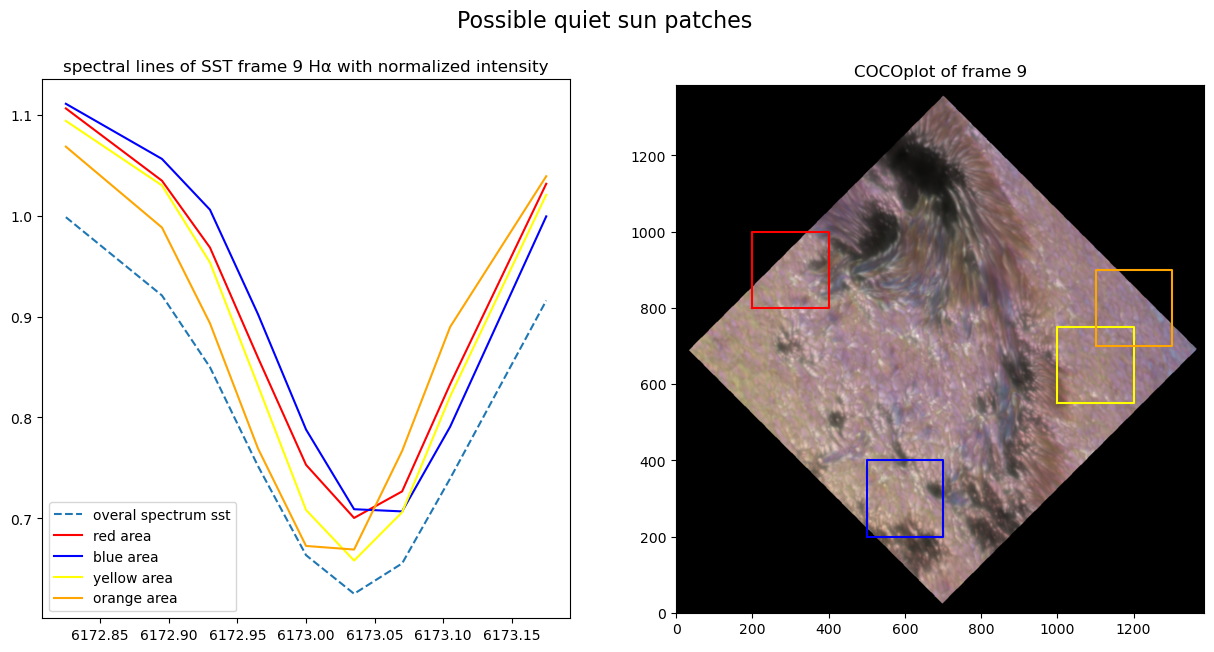

In [23]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Fe.ccp_frame(frame,Show=False)
# xlim, ylim
X = [ [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Fe.frame_integrated_spect(frame)
ax[0].plot(Fe._wavel, Fe.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Fe.sst_wav + theta[0], theta[2] * theor_Fe.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]



ax[1].imshow(Fe.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Fe._wavel, Fe.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Fe.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [26]:
color_wanted_patch = 'orange'

the edges of the patch are denoted by the xlim: (1100, 1300) and ylim: (700, 900)


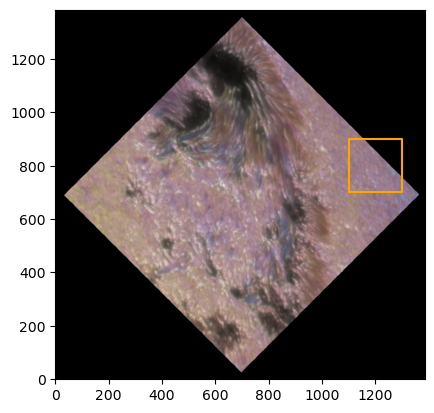

{'frame': 9, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'orange'}

In [27]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Fe.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
Fe.quiet_sun

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [28]:
sst_data = Fe
Fe.shape

(83, '??', 9, 1386, 1386)

In [29]:
Fe.calculate__FOV_spect_over_time()

In total 83 frames.
Now calculating frame:
82

In [30]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'orange'}

# Comparing to atlas: fixing quiet sun!

In [41]:
import use_nessi as un1
import data_analysis as da

atlas = f.getdata("E:/solar flares/data/2017-09-06/fits/solar_atlas_V1_405-1065.fits")
atlas_w = np.arange(len(atlas)) * -0.003766534468 + 24700.0858041
aw = 1e8 / atlas_w

lw = sst_data._wavel[0]
rw = sst_data._wavel[-1]

if lw > aw[-1] or rw < aw[0]:
    print(f"The line of sst and atlas do not coincde! SST: min={lw}, max={rw}")
    print(f"and atlas: min={aw[0]}, max={aw[-1]}. The advise is taking a new consistent atlas.")
    raise ValueError("The line of sst and atlas do not coincde.")

llw = np.where(aw > lw-3)[0][0]
lrw = np.where(aw > rw+3)[0][0]

fd = atlas[llw:lrw]
fdw = aw[llw:lrw]

ff = interp1d(fdw, fd, kind='linear', fill_value="extrapolate")
# Use this function to compute the new values
fdd = ff(sst_data._wavel)

sst_wav = sst_data._wavel
quiet_spect = sst_data.quiet_spect


def fit_atlas_to_nessi(aa2, minimum=True, quality=True, initial_values=None):



    l = len(sst_wav)
    data = [sst_wav,  quiet_spect ,np.zeros(l)+0.001,np.zeros(l)+0.001]

    multiplier = 1/0.85

    # theta = [horizontale translatie, verticale translatie, verticale schaalfactor]
    model_atlas = lambda theta : interp1d(fdw , aa2*theta[2] , kind='linear', fill_value="extrapolate")


    # fdw + rv,aa2*multiplier, color='black', lw=2, label='Atlas Convolved'
    # sst_wav, test_si, color='red', label='Full CLV'
    if initial_values is None:
        initial_values=np.array([0.8, 0, multiplier])

    mini = da.optimalisatie(data, model=model_atlas, beginwaarden=initial_values, fout_model=None, plot=False)
    theta = mini['x']
    da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
                labely=" $Intensity$  [arbitrary units]", figname=None , error=False)
    if quality:
        print(mini)
        da.kwaliteit_fit(data, mini)
    sst_data.theta_nessi_to_quiet_sun = theta
    return theta
    


def quiet_spect_atlas_check(show_all=False,initial_values_fit=None):
        # if self.neglect_atlas:
        #     return
        # test_si = quiet_spect

        # #test_si = test_si/np.min(test_si)*np.min(test_si)
        # test_si = test_si/test_si[0]
        # sst_dc = sst_dc/sst_dc[0]
        # fdd = fdd/fdd[0]

        # quiet_spect = test_si


        import ISPy.spec.crisp as c
        dw = 0.07
        ntw = 59
        tw = (np.arange(ntw)-ntw//2)*dw
        # fpife = c.crisp(np.median(sst_wav))
        fc = c.crisp(np.median(sst_wav))
        tr = fc.dual_fpi(tw, erh = -0.022) #6301-2

        tr /= tr.sum()
        inst_prof = np.zeros((len(tr),2))
        inst_prof[:,0] = tw+np.abs(tw.min())
        inst_prof[:,1] = tr

        import ISPy.spec.calib as cb

        aa = cb.convolve_atlas(fdw,fd,inst_prof)
        aa2=aa
        # fit_atlas_to_nessi(quality=show_all, initial_values=initial_values_fit)
        theta  = fit_atlas_to_nessi(aa2,  minimum=True, quality=True, initial_values=initial_values_fit)


        if show_all:
            print(len(fdw))

            plt.plot(fdw,fd, label="Atlas")
            plt.plot(fdw, aa, label="Atlas Convolved")
            plt.legend()
            plt.show()


        ff = interp1d(fdw+theta[0], aa2*theta[2]+theta[1], kind='linear', fill_value="extrapolate")
        # Use this function to compute the new values
        fdd = ff(sst_wav)


        fig = plt.subplots(1, 2, figsize=(15,7))
        plt.subplot(121)
        plt.plot(fdw + theta[0] ,fd*theta[2]+theta[1], color='black', linestyle='--', alpha=0.5, label='Atlas (Reiners et al. 2015)')
        plt.plot(fdw + theta[0],aa2*theta[2]+theta[1], color='black', lw=2, label='Atlas Convolved')
        sst_data.atlas_saas_profile = interp1d(fdw + theta[0], aa2*theta[2]+theta[1])(sst_wav)
        # plt.plot(sst_wav, s, color='blue', label='Disk Center')
        plt.plot(sst_wav, quiet_spect, color='red', label='quiet spec')
        plt.xlabel(r'Wavelength [$\rm\AA$]')
        plt.ylabel('Intensity')
        plt.legend()
        # plt.xlim()

        atlas_convolved = [fdw + theta[0],aa2*theta[2]+theta[1]]

        plt.subplot(122)
        plt.plot(sst_wav, quiet_spect/fdd, label='CLV', color='red')
        # plt.plot(sst_wav, s/fdd, label='DC', color='blue')
        plt.xlabel(r'Wavelength [$\rm\AA$]')
        plt.ylabel('Offset [%]')
        plt.legend()

        # plt.ylim(0.93,1.025)
        plt.show()


<>:50: SyntaxWarning: invalid escape sequence '\A'
<>:50: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_21636\448584398.py:50: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",


crisp::read_reflectivity: (RL,RH)[6173.0] = (0.8446171942884075, 0.9381519180111797)


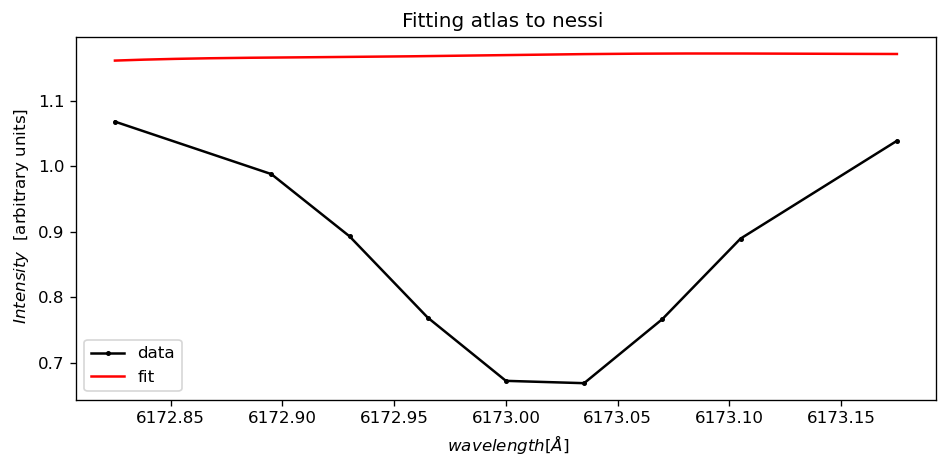

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1018.2998678834372
        x: [ 8.000e-01  0.000e+00  1.176e+00]
      nit: 0
      jac: [ 0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 4
     njev: 1
de p-waarde is  5.165264695066699e-34 
Chi^2 reduced= 169.71664464723952 
aantal vrijheidgraden= 6 
chi^2= 1018.2998678834372
we behouden de fit tot op een betrouwbaarheidsniveau van  5.165264695066699e-34 
Oftewel verwerp als p-waarde <lpha-niveau 


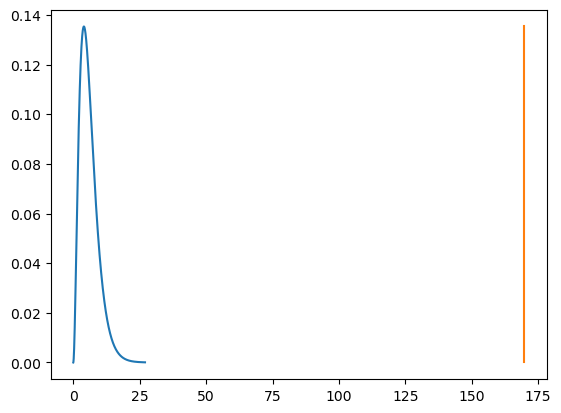

4424


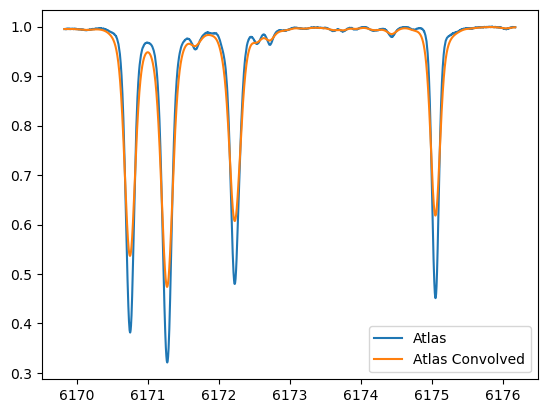

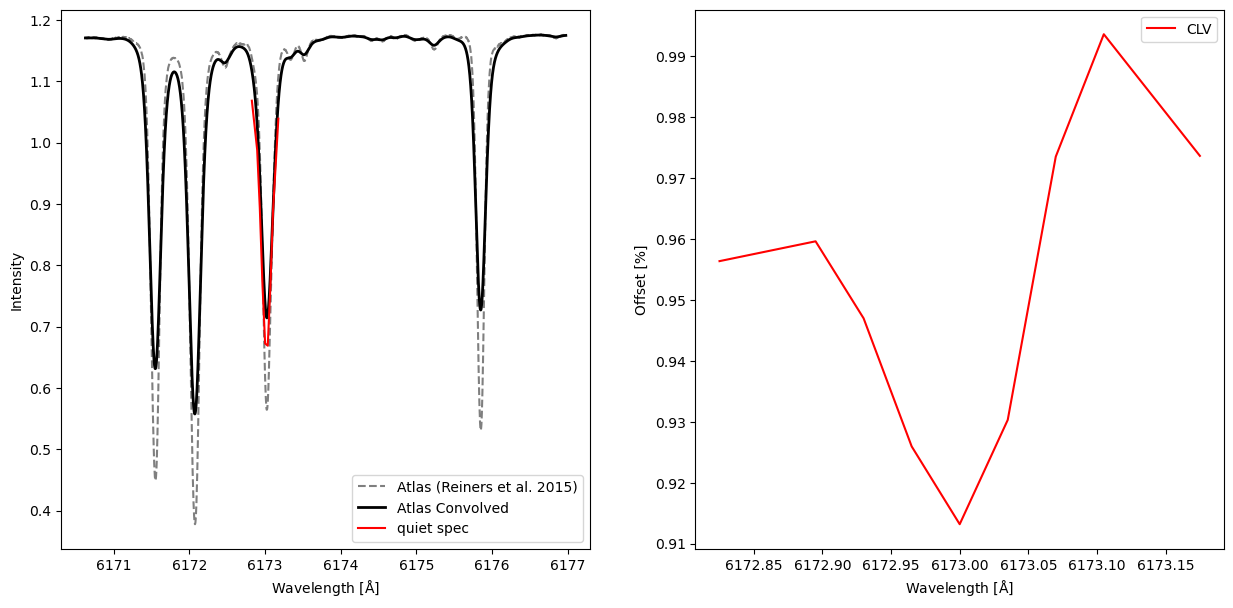

In [42]:
quiet_spect_atlas_check(show_all=True ,initial_values_fit=None)


# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [55] at time ['t=10:06:28 UT'].
The SST data runs from t=09:48:53 UT to t=10:15:06 UT.
The areafactor for THIS flare is 0.0010726481974066735 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 86.2%.


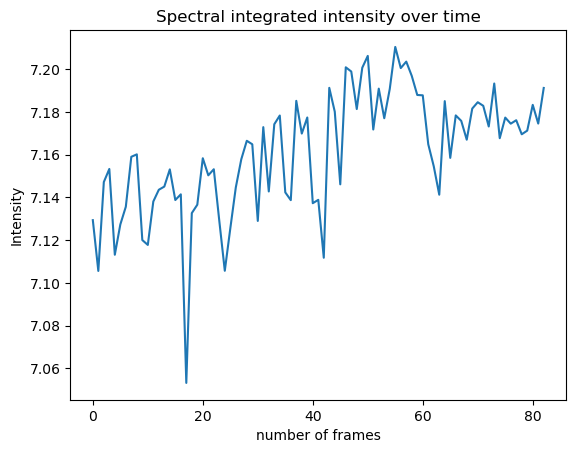

In [44]:
reload(un)
un.save_for_further_analysis(Fe, None)


# Movie Making

Intensity limit calculation for first time.


Intensity limit is saved.
frame: 0, 09:48:53.25791, total number of frames: 83 


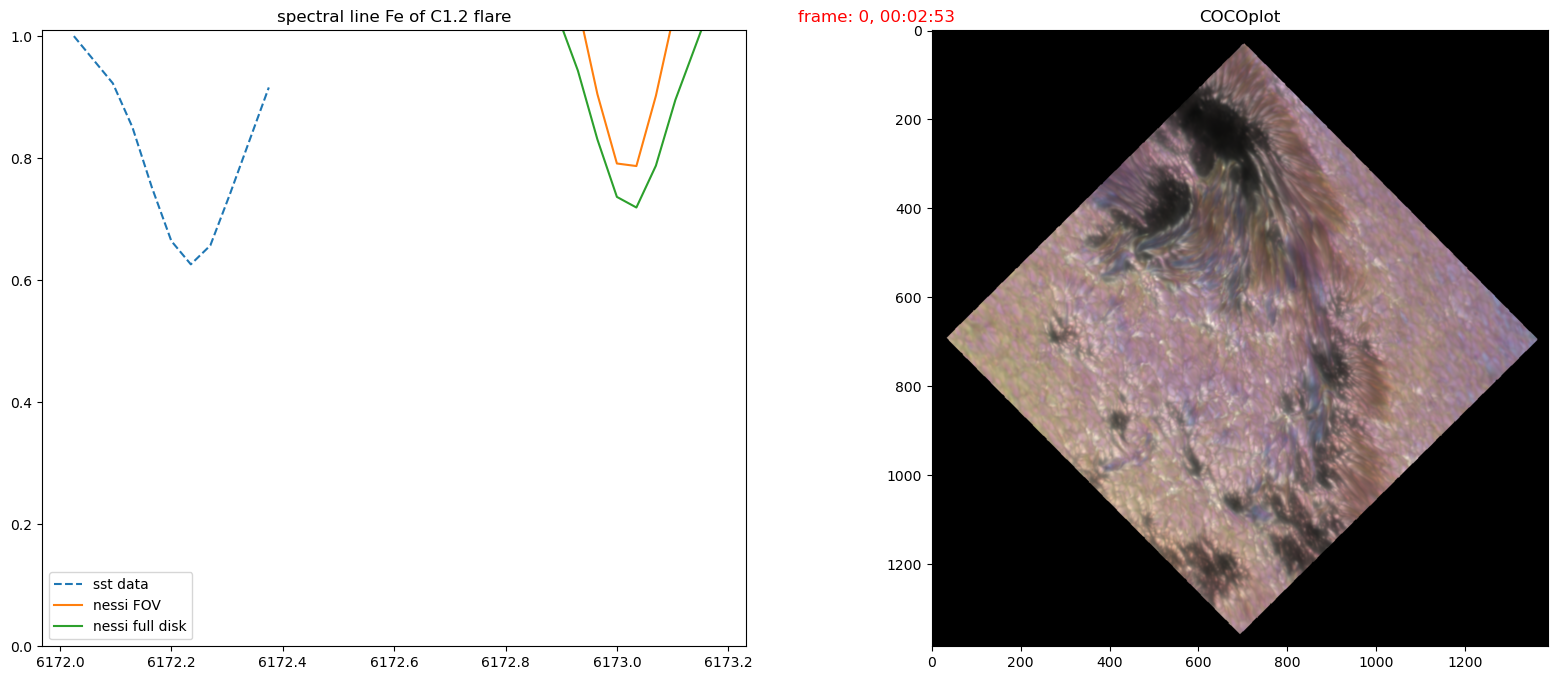

0 

MovieWriter stderr:
x264 [error]: malloc of size 9106752 failed
[vost#0:0/libx264 @ 000002BDB73005C0] Error while opening encoder - maybe incorrect parameters such as bit_rate, rate, width or height.
[out#0/mp4 @ 000002BDB72BB080] Nothing was written into output file, because at least one of its streams received no packets.

E:\solar flares/data/2017-09-06\use_nessi3.py:309: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:448: SyntaxWarning: invalid escape sequence '\A'
  labelx="wavelength $[\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:1233: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="fitting Nessi to sst data ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:1923: SyntaxWarning: invalid escape sequence '\D'
  print(f'The maxim

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '2000x800', '-pix_fmt', 'rgba', '-framerate', '6', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'E:/solar flares/data/animations/C12_Fe_animation.mp4']' returned non-zero exit status 4294967274.

In [45]:
# fill in here all arguments
theor_line = None
sst_data = Fe
name_of_flare = "C1.2"
name_of_line = "Fe"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=2, show_boundary=False)

In [35]:
# import matplotlib.pyplot as plt
# import numpy as np

# import matplotlib.animation as animation

# fig, ax = plt.subplots()


# def f(x, y):
#     return np.sin(x) + np.cos(y)

# x = np.linspace(0, 2 * np.pi, 120)
# y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# # ims is a list of lists, each row is a list of artists to draw in the
# # current frame; here we are just animating one artist, the image, in
# # each frame
# ims = []
# for i in range(60):
#     x += np.pi / 15
#     y += np.pi / 30
#     im = ax.imshow(f(x, y), animated=True)
#     if i == 0:
#         ax.imshow(f(x, y))  # show an initial one first
#     ims.append([im])

# ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
#                                 repeat_delay=1000)

# # To save the animation, use e.g.
# #
# ani.save("movie.mp4")
# #
# # or

# # writer = animation.FFMpegWriter(
# #     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# # ani.save("movie.mp4", writer=writer)

# plt.show()

: 